# Once More with K-Means

Alison Casson\
50307846\
MTH 448: Project 2

### MNIST Database
MNIST stands for “Modified National Institute of Standards and Technology.” The MNIST Database is a collection of images of handwritten digits consisting of 60,000 training images and 10,000 testing images. Each image is in greyscale and has a size of 28x28 pixels. It is commonly used for training and testing in machine learning as well as training image processing systems. 

### How can we use Clustering for Data Analysis?
Clustering is a method of data mining that finds similar groups of objects in order to form clusters. By dividing a given dataset into groups of similar objects, clustering allows for data reduction, pattern recognition, and outlier detection. Clustering condenses larges amounts of data into a manageable number of groups. It identifies natural groupings in data without pre-labeled categories and it identifies objects that do not belong to any cluster.  
There are many different methods used for cluster analysis including k-means, hierarchical, mean shift, and density-based clustering. 
This project will focus on clustering using k-means. 

### K-Means Clustering
K-means is a partitioning algorithm. This algorithm works well on large data sets. It divides data into a given number, `k`, of clusters. It assigns each object, or data point, to the nearest cluster center and updates each cluster center until all data points of the same type converge. 

### Project Objectives
The goal of this project is to explore the use of K-Means clustering on the MNIST dataset
It is split into two parts. Part one focuses on applying k-means to the dataset and part two focuses on improving the speed of k-NN predictions by reducing the amount of training data. 


### Imported Libraries

In [387]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time as time
from scipy.stats import mode

from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import adjusted_rand_score
from sklearn.model_selection import train_test_split

### Training Data

In [389]:
data = np.loadtxt("mnist_train.csv", delimiter = ",",dtype=int)            # loads the csv file and make data into an array

images = data[:,1:]                                                        # selects all rows except for the first column of the imported dataset

training_data = images[:40000]                                             # selects the first 40,0000 rows from `images` and defines it as training data

testing_data = images[40000:]                                              # selects all rows after 40,000 from `images` and defines it as testing data


labels = data[:,0]                                                         # selects all rows in the first column

training_labels = labels[:40000]                                           # denotes the first column of the the first 40,000 rows as training labels

testing_labels = labels[40000:]                                            # denotes all rows after 40,0000 from `labels` as testing data

## Part 1: Creating Clusters


### Methodology

The goal for Part 1 is to apply k-means clustering to the MNIST training dataset to predict the cluster for each test image, map each cluster to its predicted label (from training), and compute the classification accuracy.

To create the clusters and apply the K-Means algorithm:

1. Import the MNIST data set (done above)
2. Create the K-Means model using a predefined number 'k' of clusters
3. Fit the K-Means model to the training data
4. Predict the cluster assignment for each training data point and store the result
5. Assign predicted labels to clusters
6. Compute the centroids
7. Calculate the time it takes for the clusters to be created
8. Display the predicted label for each centroid

Using this data, the accuracy of the of the K-Means algorithm can be determined.

In [390]:
def kmean_calclulate(n_clusters, random_state):                                                                       # Define a function 'kmean_calclulate' that takes the number of clusters and a random state as parameters

    start = time.time()                                                                                               # Record the current time to measure how long the KMeans computation takes

    kmeans = KMeans(n_clusters, random_state)                                                                         # Instantiate the KMeans object with a predefined number of clusters 'k' and a fixed random state of 36
                                                                                                                      # Note: 'k' is assumed to be defined elsewhere; ideally, it should match the 'n_clusters' parameter

    cluster_assignments = kmeans.fit_predict(training_data)                                                           # Fit the KMeans model on the training data and predict cluster assignments for each training data point

    predicted_labels = np.zeros(k, dtype=int)                                                                         # Initialize an array of zeros with length 'k' to store the predicted label for each cluster

    for i in range(k):                                                                                                # Loop over each cluster index from 0 to k-1
        labels_in_cluster = training_labels[cluster_assignments == i]                                                 # Extract the actual labels from the training data that are assigned to the current cluster 'i'
        if len(labels_in_cluster) > 0:                                                                                # If there are any labels in the current cluster Use np.bincount to count occurrences of each label and find the most frequent one
            predicted_labels[i] = np.bincount(labels_in_cluster).argmax()                                             # Assign the most common label in the cluster to 'predicted_labels' at index 'i'
        else:
            predicted_labels[i] = -1                                                                                  # If no labels are present in the cluster, assign a default label of -1

    centroids = kmeans.cluster_centers_                                                                               # Retrieve the coordinates of the cluster centers (centroids) from the KMeans model

    counts = np.bincount(cluster_assignments)                                                                         # Count the number of data points assigned to each cluster using np.bincount

    end = time.time()                                                                                                 # Record the time after the computation has finished

    telapsed = end - start                                                                                            # Calculate the total elapsed time by subtracting the start time from the end time

    print(telapsed)                                                                                                   # Output the elapsed time to the console

    return kmeans, cluster_assignments, predicted_labels, counts, centroids, time                                     # Return a tuple containing the cluster assignments, predicted labels, counts per cluster, centroids, and the time module


def kmeans_display(n_clusters, random_state):                                                                         # Define a function 'kmeans_display' that takes the number of clusters and a random state as parameters

    kmeans, cluster_assignments, predicted_labels, counts, centroids = kmeans_calculate(n_clusters, random_state)     # Call the 'kmean_calclulate' function to perform the KMeans clustering; note that the returned values are not captured

    plt.figure(figsize=(10,4))                                                                                        # Create a new figure for plotting with a size of 10 inches by 4 inches

    for i, center in enumerate(centroids):                                                                            # Loop over each centroid (and its index) from the global 'centroids' variable
        plt.subplot(2, 5, i + 1)                                                                                      # Create a subplot in a grid layout of 2 rows and 5 columns, placing the current plot at position i+1
        plt.imshow(center.reshape(28, 28), cmap='gray')                                                               # Display the current centroid as a grayscale image by reshaping it to 28x28 pixels
        plt.title(f"Centroid {i}\nPredicted label: {predicted_labels[i]}\nCount: {counts[i]}")                        # Set the title of the subplot with the centroid index, its predicted label, and the count of points in that cluster
        plt.axis('off')                                                                                               # Remove the axis ticks and labels for a cleaner visualization

    plt.tight_layout()                                                                                                # Adjust the layout to prevent overlapping subplots and ensure neat spacing

    plt.show()                                                                                                        # Display the final plotted figure with all the subplots


K-Means clustering completed in 3.89 seconds.


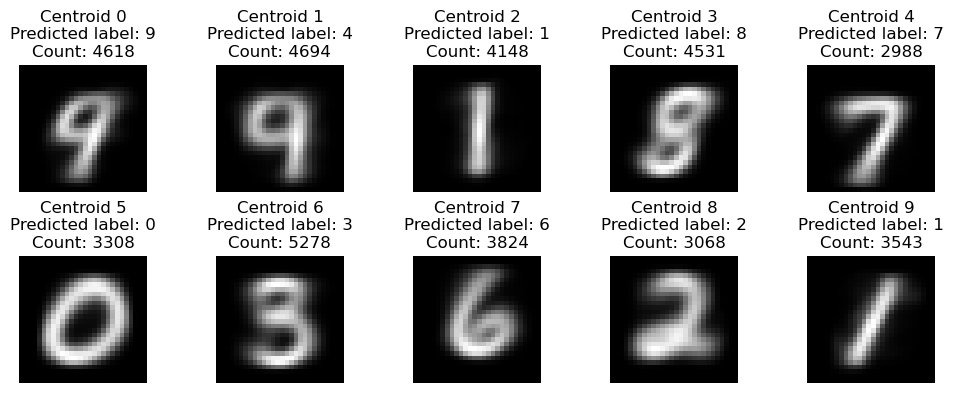

In [488]:
kmeans_display(10, 42)

In [454]:
def evaluate_clustering(kmeans, predicted_labels, testing_data, testing_labels):
 
    test_cluster_assignments = kmeans.predict(testing_data)                                       # Assign each test image to a cluster.
    

    test_predicted_labels = predicted_labels[test_cluster_assignments]                            # Map cluster indices to predicted labels.
    

    accuracy = np.mean(test_predicted_labels == testing_labels)                                   # Calculate and return accuracy.
    
    print(f"KMeans classification accuracy: {accuracy * 100:.2f}%")
    
    return accuracy

In [489]:
kmeans_model, _, predicted_labels, _, _ = kmeans_calculate(n_clusters=10, random_state=42)
evaluate_clustering(kmeans_model, predicted_labels, testing_data, testing_labels)

K-Means clustering completed in 3.94 seconds.
KMeans classification accuracy: 62.21%


0.6221

## Part 2: Data Analysis

### 2a: Increasing Prediction Speed

#### Methodology

The goal of Part 2a is to evaluates k-NN classification accuracy on the MNIST dataset before and after reducing the training set via clustering using K-Means. 

1. Fit the k-NN Classifier to the original training dataset
2. Evaluate the baseline accuracy for K-NN for comparison
3. Create the reduced training dataset using K-Means
4. Evaluate the accuracy of K-NN on the reduced dataset
5. Calculate the time it takes for K-NN to run on the full dataset and each reduced dataset 
6. Do comparative ananlysis on the outputs for speed and accuracy

In [447]:
def evaluate_knn_accuracy(training_data, training_labels, testing_data, testing_labels, clusters_per_digit=100, n_neighbors=3, random_state=42): # Define a function to evaluate KNN classification using both full data and clustered (reduced) data.

    baseline_start = time.time()                                                                # Record the start time for baseline KNN evaluation
    baseline_knn = KNeighborsClassifier(n_neighbors=n_neighbors)                                # Initialize the baseline KNN classifier using the specified number of neighbors


    
    baseline_knn.fit(training_data, training_labels)                                            # Fit the baseline KNN model on the complete training dataset with its labels
    baseline_accuracy = baseline_knn.score(testing_data, testing_labels)                        # Evaluate and store the accuracy of the baseline KNN classifier on the testing dataset
    baseline_knn_time = time.time() - baseline_start                                            # Calculate the elapsed time for training and evaluating the baseline KNN classifier

    reduced_train_data = []                                                                     # Initialize an empty list to collect reduced training data (cluster centroids)
    reduced_train_labels = []                                                                   # Initialize an empty list to collect labels corresponding to the centroids

    clustering_start = time.time()                                                              # Record the start time for the clustering process

    for digit in np.unique(training_labels):                                                    # Iterate over each unique digit (or label) present in the training labels

        digit_indices = np.where(training_labels == digit)[0]                                   # Find the indices of all training samples that have the current digit as their label
        digit_data = training_data[digit_indices]                                               # Extract the subset of training data corresponding to the current digit using the identified indices

        kmeans = KMeans(n_clusters=clusters_per_digit, random_state=random_state)               # Create a KMeans instance to cluster the data for the current digit into 'clusters_per_digit' clusters
        kmeans.fit(digit_data)                                                                  # Fit the KMeans model on the current digit's data

        centroids = kmeans.cluster_centers_                                                     # Retrieve the centroids (cluster centers) determined by KMeans for the current digit
        reduced_train_data.append(centroids)                                                    # Append the centroids to the list of reduced training data
        reduced_train_labels.append(np.full(centroids.shape[0], digit))                         # Create an array filled with the current digit (of length equal to the number of centroids) and append it to the list of reduced training labels

    clustering_time = time.time() - clustering_start                                            # Calculate the total time taken for the clustering process across all digits

    reduced_train_data = np.vstack(reduced_train_data)                                          # Vertically stack the list of centroid arrays into a single numpy array to form the reduced training data
    reduced_train_labels = np.concatenate(reduced_train_labels)                                 # Concatenate all the individual label arrays into a single numpy array for the reduced training labels

    reduced_knn_start = time.time()                                                             # Record the start time for KNN evaluation on reduced data
    reduced_knn = KNeighborsClassifier(n_neighbors=n_neighbors)                                 # Initialize a new KNN classifier for the reduced dataset using the specified number of neighbors
    reduced_knn.fit(reduced_train_data, reduced_train_labels)                                   # Fit the KNN classifier using the reduced training data (centroids) and their corresponding labels
    reduced_accuracy = reduced_knn.score(testing_data, testing_labels)                          # Evaluate the accuracy of the KNN classifier (trained on reduced data) using the original testing dataset
    reduced_knn_time = time.time() - reduced_knn_start                                          # Calculate the elapsed time for training and evaluating the reduced KNN classifier

    return {
        'baseline_accuracy': baseline_accuracy,                                                 # Return the accuracy of the baseline KNN classifier trained on full data
        'reduced_accuracy': reduced_accuracy,                                                   # Return the accuracy of the KNN classifier trained on the reduced (clustered) data
        'reduced_training_size': reduced_train_data.shape[0],                                   # Return the number of training samples in the reduced dataset (total number of centroids)
        'clustering_time': clustering_time,                                                     # Return the total time taken for the clustering process
        'baseline_knn_time': baseline_knn_time,                                                 # Return the time taken to train and evaluate the baseline KNN classifier
        'reduced_knn_time': reduced_knn_time                                                    # Return the time taken to train and evaluate the KNN classifier on the reduced data
    }


In [449]:
results = evaluate_knn_accuracy(training_data, training_labels, testing_data, testing_labels, clusters_per_digit=100, n_neighbors=3, random_state=42) # Call the evaluate_knn_with_clustering function with the full training and testing data, using 100 clusters per digit, 3 neighbors for KNN, and a random_state of 42. Store the returned results (a dictionary with accuracy and timing metrics) in the variable 'results'.

print(f"Baseline k-NN Accuracy: {results['baseline_accuracy'] * 100:.2f}%")            # Print the baseline k-NN classification accuracy (multiplied by 100 to convert to a percentage) formatted to two decimal places.
print(f"Baseline k-NN Time: {results['baseline_knn_time']:.2f} seconds")               # Print the time taken to train and evaluate the baseline KNN classifier, formatted to two decimal places.

print(f"Clustering Time: {results['clustering_time']:.2f} seconds")                    # Print the total time taken for the clustering process (across all digits), formatted to two decimal places.
print(f"Reduced Training Set Size: {results['reduced_training_size']} samples")        # Print the size of the reduced training set (i.e., the total number of centroids produced from clustering).

print(f"Reduced k-NN Accuracy: {results['reduced_accuracy'] * 100:.2f}%")              # Print the accuracy of the KNN classifier when trained on the reduced (clustered) data, formatted as a percentage to two decimal places.
print(f"Reduced k-NN Time: {results['reduced_knn_time']:.2f} seconds")                 # Print the time taken to train and evaluate the KNN classifier on the reduced dataset, formatted to two decimal places.


Baseline k-NN Accuracy: 96.71%
Baseline k-NN Time: 56.97 seconds
Clustering Time: 11.27 seconds
Reduced Training Set Size: 1000 samples
Reduced k-NN Accuracy: 94.76%
Reduced k-NN Time: 2.95 seconds


Baseline k-NN Accuracy: 96.71%
Clusters per digit: 5 -> Reduced Accuracy: 79.02%, Total Time: 4.6215 sec
Clusters per digit: 10 -> Reduced Accuracy: 86.42%, Total Time: 5.4300 sec
Clusters per digit: 20 -> Reduced Accuracy: 90.83%, Total Time: 6.3829 sec
Clusters per digit: 50 -> Reduced Accuracy: 93.67%, Total Time: 9.4196 sec
Clusters per digit: 100 -> Reduced Accuracy: 94.76%, Total Time: 14.4223 sec
Clusters per digit: 200 -> Reduced Accuracy: 95.65%, Total Time: 22.4623 sec


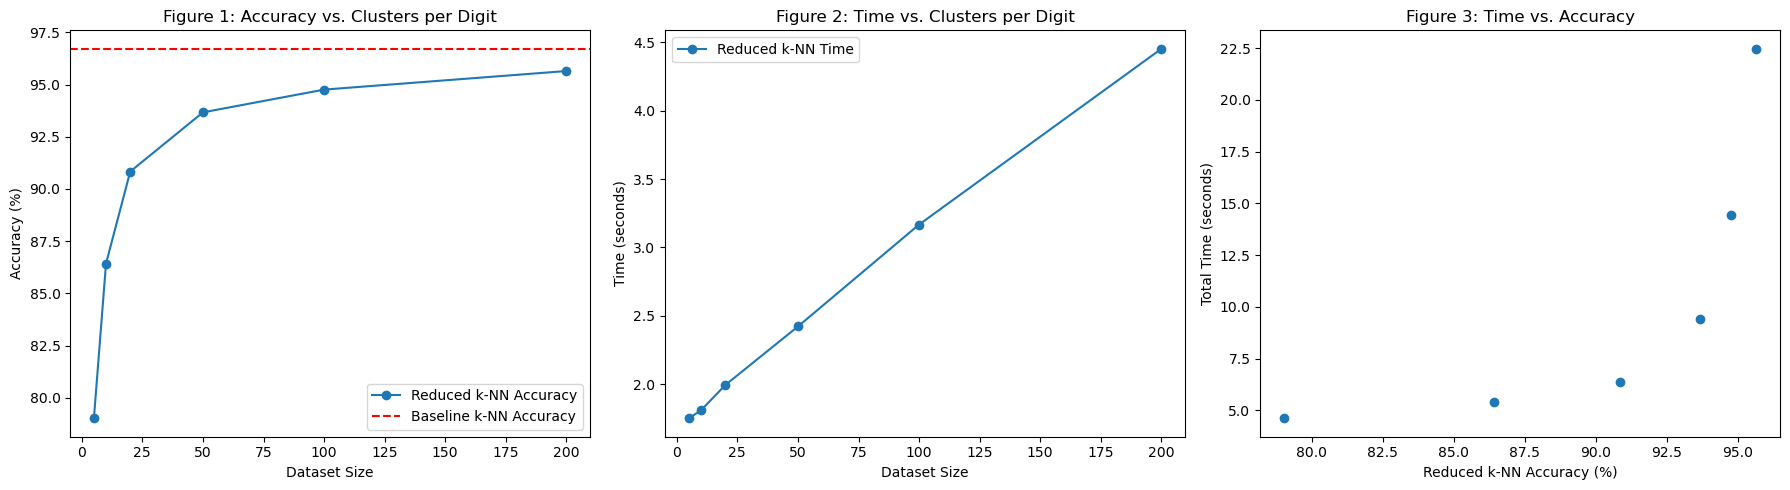

In [515]:
def evaluate_knn_with_clustering(training_data, training_labels, testing_data, testing_labels, clusters_per_digit=100, n_neighbors=3, random_state=42):   # Evaluation function to assess k-NN classification accuracy after reducing training data via clustering.
    
    reduced_train_data = []                                                                                                                               # List for storing centroids from clustering per digit
    reduced_train_labels = []                                                                                                                             # List for storing labels corresponding to each centroid

    clustering_start = time.time()                                                                                                                        # Record the start time for clustering
   
    for digit in np.unique(training_labels):                                                                                                              # Loop over each unique digit in the training labels
        digit_indices = np.where(training_labels == digit)[0]                                                                                             # Find indices of all samples with the current digit label
        digit_data = training_data[digit_indices]                                                                                                         # Extract training data corresponding to the current digit

        kmeans = KMeans(n_clusters=clusters_per_digit, random_state=random_state)                                                                         # Initialize KMeans with specified clusters and random state
        kmeans.fit(digit_data)                                                                                                                            # Fit KMeans clustering on the current digit's data

        centroids = kmeans.cluster_centers_                                                                                                               # Retrieve the centroids from the clustering
        reduced_train_data.append(centroids)                                                                                                              # Append centroids to the reduced training data list
        reduced_train_labels.append(np.full(centroids.shape[0], digit))                                                                                   # Append an array of the current digit repeated for each centroid

    clustering_time = time.time() - clustering_start                                                                                                      # Compute total clustering time

    reduced_train_data = np.vstack(reduced_train_data)                                                                                                    # Stack all centroid arrays vertically into one array
    reduced_train_labels = np.concatenate(reduced_train_labels)                                                                                           # Concatenate all label arrays into one array

    reduced_knn_start = time.time()                                                                                                                       # Record the start time for reduced k-NN evaluation
    reduced_knn = KNeighborsClassifier(n_neighbors=n_neighbors)                                                                                           # Initialize k-NN classifier with the specified number of neighbors
    reduced_knn.fit(reduced_train_data, reduced_train_labels)                                                                                             # Train the k-NN classifier on the reduced training set
    reduced_accuracy = reduced_knn.score(testing_data, testing_labels)                                                                                    # Evaluate k-NN accuracy on the testing data
    reduced_knn_time = time.time() - reduced_knn_start                                                                                                    # Compute total time for k-NN evaluation on reduced data

    return {'reduced_accuracy': reduced_accuracy,                                                                                                    
            'reduced_training_size': reduced_train_data.shape[0], 
            'clustering_time': clustering_time, 
            'reduced_knn_time': reduced_knn_time}                                                                                                        # Return a dictionary containing accuracy and timing metrics for reduced k-NN                                                                                                   

  

baseline_knn = KNeighborsClassifier(n_neighbors=3)                                                                                                        # Initialize baseline k-NN with 3 neighbors
baseline_knn.fit(training_data, training_labels)                                                                                                          # Train baseline k-NN on the complete training data
baseline_accuracy = baseline_knn.score(testing_data, testing_labels)                                                                                      # Evaluate baseline accuracy on testing data
print(f"Baseline k-NN Accuracy: {baseline_accuracy * 100:.2f}%")                                                                                          # Print baseline accuracy as a percentage


clusters_list = [5, 10, 20, 50, 100, 200]                                                                                                                 # List of cluster counts per digit
reduced_accuracies = []                                                                                                                                   # List to store reduced k-NN accuracies for each configuration
total_times = []                                                                                                                                          # List to store total computation times (clustering + k-NN) for each configuration
clustering_times = []                                                                                                                                     # List to store clustering times for each configuration
reduced_knn_times = []                                                                                                                                    # List to store reduced k-NN times for each configuration


for clusters in clusters_list:
    results = evaluate_knn_with_clustering(training_data, training_labels, testing_data, testing_labels, clusters_per_digit=clusters, n_neighbors=3, random_state=42)
    reduced_accuracies.append(results['reduced_accuracy'])                                                                                                # Append the reduced accuracy to the list
    total_time = results['clustering_time'] + results['reduced_knn_time']                                                                                 # Calculate total computation time
    total_times.append(total_time)                                                                                                                        # Append total time to the list
    clustering_times.append(results['clustering_time'])                                                                                                   # Append clustering time to the list
    reduced_knn_times.append(results['reduced_knn_time'])                                                                                                 # Append reduced k-NN time to the list
    print(f"Clusters per digit: {clusters} -> Reduced Accuracy: {results['reduced_accuracy'] * 100:.2f}%, Total Time: {total_time:.4f} sec")              # Print clusters per digit, corresponding reduced accuracy, and total computation time.


fig, axs = plt.subplots(1, 3, figsize=(18, 5))                                                                                                            # Create a figure with 1 row and 3 columns of subplots, and set the overall figure size.

# Plot 1: Accuracy vs. Clusters per Digit.
axs[0].plot(clusters_list, [acc * 100 for acc in reduced_accuracies], marker='o', label='Reduced k-NN Accuracy')                                          # Plot reduced k-NN accuracy (converted to percentage) against clusters per digit using circle markers.
axs[0].axhline(y=baseline_accuracy * 100, color='r', linestyle='--', label='Baseline k-NN Accuracy')                                                      # Draw a horizontal dashed red line indicating the baseline k-NN accuracy.
axs[0].set_xlabel('Dataset Size')                                                                                                                   # Set the x-axis label
axs[0].set_ylabel('Accuracy (%)')                                                                                                                         # Set the y-axis label
axs[0].set_title('Figure 1: Accuracy vs. Clusters per Digit')                                                                                                       # Set the plot title
axs[0].legend()                                                                                                                                           # Display the legend on the subplot

# Plot 2: Computation Time vs. Clusters per Digit.                                                                                                        # Plot clustering time against clusters per digit.
axs[1].plot(clusters_list, reduced_knn_times, marker='o', label='Reduced k-NN Time')                                                                      # Plot reduced k-NN computation time against clusters per digit.
axs[1].set_xlabel('Dataset Size')                                                                                                                   # Set the x-axis label
axs[1].set_ylabel('Time (seconds)')                                                                                                                       # Set the y-axis label
axs[1].set_title('Figure 2: Time vs. Clusters per Digit')                                                                                                           # Set the plot title
axs[1].legend()                                                                                                                                           # Display the legend on the subplot

# Plot 3: Total Computation Time vs. Reduced k-NN Accuracy.
axs[2].scatter([acc * 100 for acc in reduced_accuracies], total_times, marker='o')                                                                        # Create a scatter plot of reduced k-NN accuracy (percentage) vs. total computation time.
axs[2].set_xlabel('Reduced k-NN Accuracy (%)')                                                                                                            # Set the x-axis label
axs[2].set_ylabel('Total Time (seconds)')                                                                                                                 # Set the y-axis label
axs[2].set_title('Figure 3: Time vs. Accuracy')                                                                                                                     # Set the plot title

plt.tight_layout()                                                                                                                                        # Adjust subplots to fit in the figure area without overlapping
plt.show()                                                                                                                                                # Display the figure with all subplots

#### Figure 1: Accuracy vs. Dataset Size
Looking at Figure 1, we can see that as the dataset is reduced, the accuracy decreases. 

$$
\begin{array}{|c|c|}
\hline
\textbf{Dataset Size} & \textbf{Percent Accuracy} \\
\hline
200   & 95.65 \\
100   & 94.76 \\
50    & 93.67 \\
20    & 90.83 \\
10    & 86.42 \\
5     & 79.02 \\
\hline
\end{array}
$$

We can also see that the change in accuracy is marginal until the dataset size is less than 100.

#### Figure 2: Accuracy vs. Dataset Size
While the k-NN Algorithism is very quick, in Figure 2, we see that as the dataset is reduced, the evaluation time also decreases. There is a linear ralationship between accuracy and evaluation timeDataset Size. All times decrease as cluster count decreases, but the slope for clustering time is much steeper than for reduced k-NN time.

So, reduced k-NN remains fast while clustering becomes more time-intensive at higher cluster counts. This means that for applications where training can be done in parallel, the tradeoff becomes even more favorable.

#### Figure 3: Time vs. Accuracy

Figure 3 is an efficiency plot. The curve shows the relationship between the evaluated time and accuracy of the k-NN Classifier. Looking at the curve, we can see that there is a trade off between speed and accuracy. The longer it takes to classify the data, the more accurate the algorithm is. 


## Conclusion

The goal of this project was to demonstrate how K-Means clustering can be applied to the MNIST dataset for both analysis and improved efficiency of k-NN classification. In Part 1, clustering the data revealed that the centroids generally captured the structure of handwritten digits. Having about a 60% accuracy rate and plots showing the images used for prediction, it was easy to see where the program was having trouble identifying handwritten digits. Through this, it was shown that K-Means can effectively identify patterns without labeled data. While not perfect for direct classification, the clusters gave insight into the natural groupings within the dataset.


Part 2a showed that K-Means can be a practical tool for reducing training data size without a significant loss in accuracy. In the provided graphs, Figures 1,2 and 3, the relationships between time, accuracy, and dataset size were shown. As the number of clusters decreased, classification performance also decreased, but only marginally while the number of clusters was greater than 100. Prediction speed decreased substantially when using the reduced dataset. These results highlight a tradeoff between accuracy and computational cost. K-Means clustering helped strike a balance by providing a way to compress the training data while preserving much of the original performance


Overall, K-Means proved to be a useful method for both data understanding and model optimization. While not 100% accurate, it is useful for determining handwritten digits and is an efficient way to reduce data. Future work could explore combining clustering with other dimensionality reduction techniques or applying this approach to more complex or high-dimensional datasets.